<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Audio-search" data-toc-modified-id="Audio-search-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Audio search</a></span></li><li><span><a href="#Load-audio-using-Librosa" data-toc-modified-id="Load-audio-using-Librosa-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load audio using Librosa</a></span></li><li><span><a href="#Load-audio-using-audio2numpy" data-toc-modified-id="Load-audio-using-audio2numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load audio using audio2numpy</a></span></li></ul></div>

## Audio search 

In [75]:
import soundfile
import matplotlib.pyplot as plt

In [10]:
from typing import Any, Dict, List

class VggishSegmenter():
    def __init__(self, window_length_secs=0.025, hop_length_secs=0.010, *args, **kwargs):
        """
        :param frame_length: the number of samples in each frame
        :param hop_length: number of samples to advance between frames
        """
        self.window_length_secs = window_length_secs
        self.hop_length_secs = hop_length_secs

    def segment(self, uri, buffer, *args, **kwargs) -> List[Dict]:
        result = []
        # load the data
        data, sample_rate = self.read_wav(uri, buffer)
        if data is None:
            return result
        # slice the wav array
        mel_data = self.wav2mel(data, sample_rate)
        for idx, blob in enumerate(mel_data):
            self.logger.debug(f'blob: {blob.shape}')
            result.append(dict(offset=idx, weight=1.0, blob=blob))
        return result

    def wav2mel(self, blob, sample_rate):
        self.logger.debug(f'blob: {blob.shape}, sample_rate: {sample_rate}')
        mel_spec = waveform_to_examples(blob, sample_rate).squeeze()
        self.logger.debug(f'mel_spec: {mel_spec.shape}')
        return mel_spec

    def read_wav(self, uri, buffer):
        import soundfile as sf
        wav_data = None
        sample_rate = None
        if buffer:
            wav_data, sample_rate = sf.read(io.BytesIO(buffer), dtype='int16')
        elif uri:
            wav_data, sample_rate = sf.read(uri, dtype='int16')
        else:
            return None, None
        self.logger.debug(f'sample_rate: {sample_rate}')
        if len(wav_data.shape) > 1:
            wav_data = np.mean(wav_data, axis=1)
        data = wav_data / 32768.0
        return data, sample_rate



In [12]:
import soundfile as sf

In [13]:
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

In [22]:
import audio2numpy

In [25]:
!ls

02_working_with_chunks.ipynb intro-Copy1.ipynb
ex_01_audio.ipynb            intro.ipynb
executor_save_bug.py         y.yml


In [26]:
import os

In [29]:
base_path = os.path.expanduser('~')

In [43]:
data_mp3_path = os.path.join(base_path,'Downloads','audios_jina')
data_mp3_path

'/Users/davidbuchaca1/Downloads/audios_jina'

In [46]:
#ls {data_mp3_path}

In [81]:
audio_mp3 = os.path.join(data_mp3_path, '4221451916190016245190.mp3')

## Load audio using Librosa

In [82]:
import librosa as lr

In [83]:
audio, sfreq = lr.load(audio_mp3)
time = np.arange(0, len(audio)) /sfreq

print(f'Sample frequency: {sfreq}')

/Users/davidbuchaca1/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sample frequency: 22050


[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Sound Amplitude')]

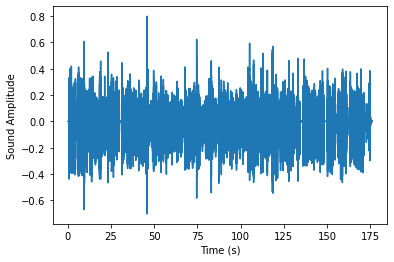

In [84]:
fig,ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')

In [87]:
audio.shape

(3882816,)

## Load audio using audio2numpy

In [80]:
audio_mp3 = audio2numpy.loader.audio_from_file(audio_mp3)

why this is a 2d array?

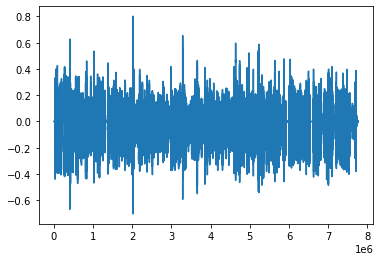

In [77]:
plt.plot(audio_mp3[0][:,0])

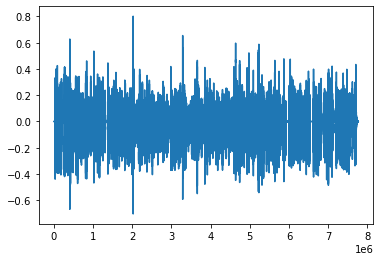

In [78]:
plt.plot(audio_mp3[0][:,1])

In [70]:
help(audio2numpy.loader.audio_from_file)

Help on function audio_from_file in module audio2numpy.loader:

audio_from_file(path, offset=0, duration=None, dtype=<class 'numpy.float32'>)
    Load an audio buffer using audioread.
    This loads one block at a time, and then concatenates the results.
    
    Parameters
    ----------
    path : string
        File path
    offset : int (optional)
        sample offset of the loading start
    duration : None or float (optional)
        duration in seconds
    dtype : numpy dtype (optional)
        data type. By default float32

